# 災害データ分析とストーリーテリング（EM-DAT）

## はじめに
このノートブックでは、EM-DAT（国際災害データベース）のデータを用いて、
**世界の災害が時間とともにどのように変化し、人々にどのような影響を与えてきたのか**
を分析する。

単なる数値の集計ではなく、
「どのような災害が」「いつ・どこで」「どれほどの被害をもたらしたのか」
をストーリーとして伝えることを目的とする。


## データセットの概要

- データソース: EM-DAT  
  https://www.emdat.be/

- 主な使用カラム
  - Year：災害発生年
  - Disaster Type：災害の種類
  - Region：地域
  - Total Deaths：死者数
  - Total Affected：被災者数




## フォーカスエリア

**時間的トレンド × 災害の種類 × 人への影響**

本分析では、以下の点に注目する。
- 災害の発生件数は年々どのように変化しているか
- 災害の種類によって人的被害に違いはあるか
- 地域ごとに被災の規模はどの程度異なるか


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# データ読み込み
df = pd.read_csv("emdat.csv")

# 使用する列のみ抽出
df = df[[
    "Start Year",     # 年
    "Disaster Type",  # 災害の種類
    "Region",         # 地域
    "Total Deaths"    # 死者数
]]

# 列名を分析しやすいように変更
df = df.rename(columns={"Start Year": "Year"})

# 欠損値を0で補完
df = df.fillna(0)

# 年を整数型に変換
df["Year"] = df["Year"].astype(int)

df.head()


,Year,Disaster Type,Region,Total Deaths
0,1900,Storm,Americas,6000.0
1,1900,Flood,Americas,300.0
2,1900,Epidemic,Americas,30.0
3,1900,Volcanic activity,Asia,30.0
4,1900,Earthquake,Asia,140.0


## データ前処理

- 使用する列を整理し、分析に必要な情報のみ抽出
- 列名を「Year」に統一
- 欠損値は0で補完
- 年を整数型に変換


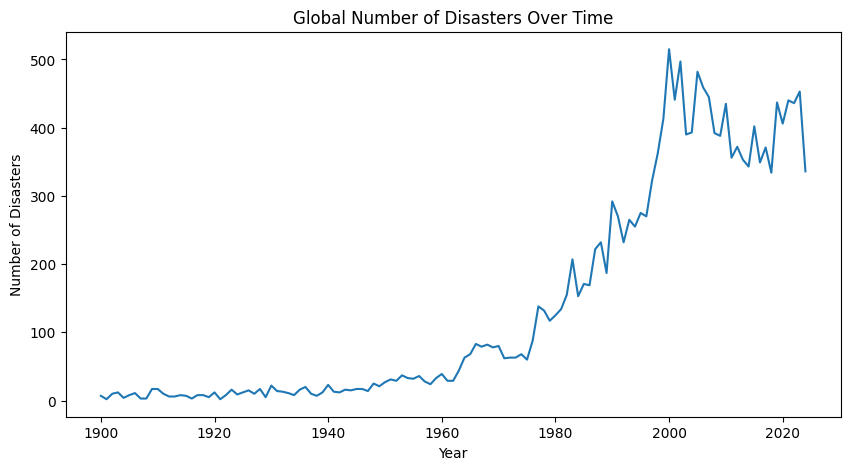

In [4]:
disasters_per_year = df.groupby("Year").size()

plt.figure(figsize=(10,5))
disasters_per_year.plot()
plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.title("Global Number of Disasters Over Time")
plt.show()


## 洞察①：災害発生件数の変化

2000年以降、災害の報告件数が増加していることが分かる。
これは災害そのものの増加だけでなく、
観測技術や報告体制の改善が影響している可能性もある。


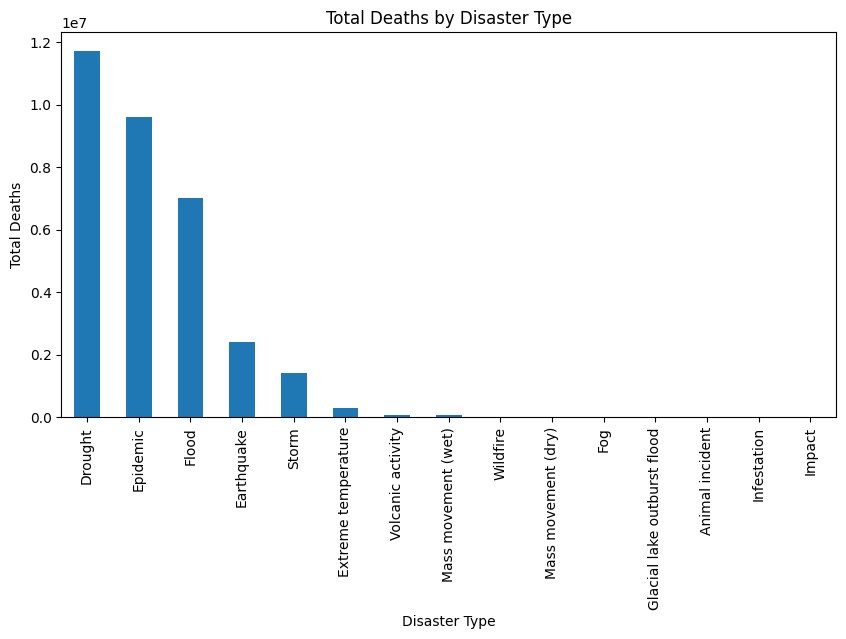

In [5]:
deaths_by_type = (
    df.groupby("Disaster Type")["Total Deaths"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
deaths_by_type.plot(kind="bar")
plt.ylabel("Total Deaths")
plt.title("Total Deaths by Disaster Type")
plt.show()


## 洞察②：災害の種類と死者数

地震や洪水は、発生頻度だけでなく死者数の面でも影響が大きい。
発生回数が少なくても、一度の被害が甚大な災害も存在する。


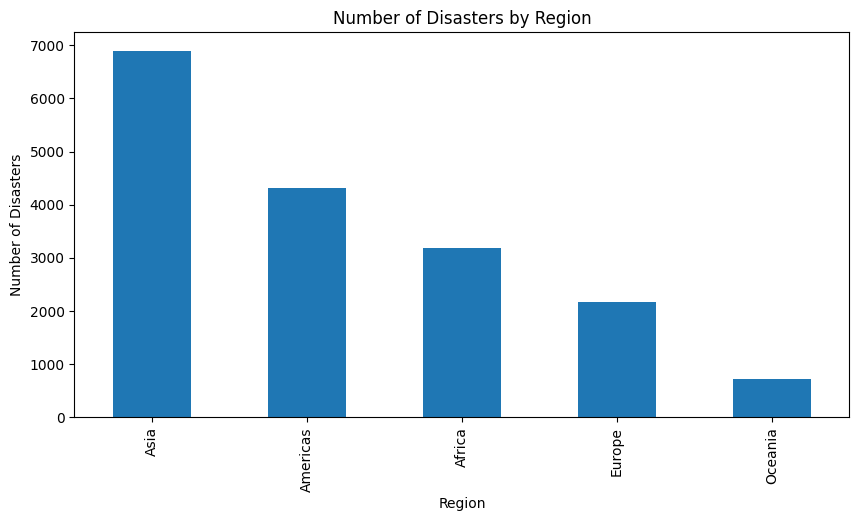

In [6]:
disasters_by_region = (
    df.groupby("Region").size()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
disasters_by_region.plot(kind="bar")
plt.ylabel("Number of Disasters")
plt.title("Number of Disasters by Region")
plt.show()


## 洞察③：地域別の災害発生件数

アジア地域は、他の地域と比べて災害件数が多い。
人口規模や自然災害の種類（洪水、台風など）が影響していると考えられる。


## まとめ（サマリー）

本分析から、以下の3点が明らかになった。

1. 災害の発生件数は長期的に増加傾向にある  
2. 災害の種類によって死者数の規模は大きく異なる  
3. 地域ごとに災害の発生件数に差がある  

これらの結果は、防災対策や国際支援を考える際に、
地域特性と災害タイプを考慮する重要性を示している。


## 感想・学んだこと

データを可視化することで、数字だけでは気づきにくい
世界的な災害の傾向を直感的に理解できた。
特に、同じ災害でも地域によって影響が大きく異なる点が印象的だった。

今後は、人口やGDPなどの社会経済データと組み合わせた
より深い分析にも挑戦したい。
